## Train Data

In [1]:
import math

import pandas as pd

df_nodes_train = pd.read_csv("network_created/nodes_real_train.csv", sep="\t")
df_nodes_train.rename(columns={"id" : "Spotify ID"}, inplace=True)
df_nodes_train

,Spotify ID,artist_name,followers,popularity,genres
0,5M52tdBnJaKSvOpJGz8mfZ,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro..."
1,21451j1KhjAiaYKflxBjr1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',..."
2,2UazAtjfzqBF0Nho2awK4z,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru..."
3,3sgFRtyBnxXD5ESfmbK4dl,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']"
4,3Isy6kedDrgPYoTS1dazA9,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']"
...,...,...,...,...,...
3696,2K13AVg3bFpHSxDM1vJ0qA,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl..."
3697,7xDiCwbxPFkL5mFgjirxpV,Nate Fox,5.064338e+05,45.953952,NaN
3698,0IVapwlnM3dEOiMsHXsghT,Nosaj Thing,5.064338e+05,45.953952,NaN
3699,1EpyA68dKpjf7jXmQL88Hy,Noname,5.064338e+05,45.953952,NaN


In [2]:
df_edges_train = pd.read_csv("network_created/edges_real_train.csv", sep="\t")
df_edges_train

,Source,Target
0,21451j1KhjAiaYKflxBjr1,4VMYDCV2IEDYJArk749S6m
1,21451j1KhjAiaYKflxBjr1,6OKF3qcykahwnwzxdkJsSo
2,3sgFRtyBnxXD5ESfmbK4dl,53sIBaVjXQhfH89Vu6nEGh
3,3sgFRtyBnxXD5ESfmbK4dl,7sfl4Xt5KmfyDs2T3SVSMK
4,3sgFRtyBnxXD5ESfmbK4dl,0JI82uMnNVXnDgkAr2uWlP
...,...,...
5903,1anyVhU62p31KFi8MEzkbf,7xDiCwbxPFkL5mFgjirxpV
5904,1anyVhU62p31KFi8MEzkbf,0IVapwlnM3dEOiMsHXsghT
5905,1anyVhU62p31KFi8MEzkbf,1EpyA68dKpjf7jXmQL88Hy
5906,1anyVhU62p31KFi8MEzkbf,53KwLdlmrlCelAZMaLVZqU


In [3]:
import networkx as nx
import pandas as pd


# Create a graph object
G = nx.Graph()

# Add nodes with attributes to the graph
for _, row in df_nodes_train.iterrows():
    node_attrs = {attr: row[attr] for attr in df_nodes_train.columns if attr != 'Spotify ID'}
    G.add_node(row['Spotify ID'], **node_attrs)

# Add edges with attributes to the graph
for _, row in df_edges_train.iterrows():
    edge_attrs = {attr: row[attr] for attr in df_edges_train.columns if attr not in ['Source', 'Target']}
    G.add_edge(row['Source'], row['Target'], **edge_attrs)

In [4]:
# import matplotlib.pyplot as plt
# 
# # Draw the graph
# nx.draw(G, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)
# 
# # Display the plot
# plt.show()

In [5]:
import pandas as pd
import community
import networkx as nx

# Assuming G is your graph object containing nodes and edges

# Get all connected components
connected_components = nx.connected_components(G)

# Initialize dictionaries to store metrics for each node
degree = {}
weighted_degree = {}
eccentricity = {}
closeness_centrality = {}
harmonic_closeness_centrality = {}                  #romove harm
betweenness_centrality = {}
clustering = {}
eigenvector_centrality = {}

# For each connected component
for cc in connected_components:
    # Create a subgraph of G consisting only of this component
    Gc = G.subgraph(cc).copy()

    # Calculate metrics for this component
    betweenness_centrality.update(nx.betweenness_centrality(Gc))
    closeness_centrality.update(nx.closeness_centrality(Gc))
    clustering.update(nx.clustering(Gc))
    degree.update(nx.degree(Gc))
    eccentricity.update(nx.eccentricity(Gc))
    eigenvector_centrality.update(nx.eigenvector_centrality(Gc))
    harmonic_closeness_centrality.update(nx.harmonic_centrality(Gc))
    weighted_degree.update(nx.degree(Gc, weight='weight'))


# Assign metrics as node attributes in the original graph G
nx.set_node_attributes(G, betweenness_centrality, 'betweenesscentrality')
nx.set_node_attributes(G, closeness_centrality, 'closnesscentrality')
nx.set_node_attributes(G, clustering, 'clustering')
nx.set_node_attributes(G, degree, 'degree')
nx.set_node_attributes(G, eccentricity, 'eccentricity')
nx.set_node_attributes(G, eigenvector_centrality, 'eigencentrality')
nx.set_node_attributes(G, harmonic_closeness_centrality, 'harmonicclosnesscentrality')
nx.set_node_attributes(G, weighted_degree, 'weighted degree')

# Now your graph G has all the calculated metrics stored as node attributes

In [6]:
# Assuming G is your NetworkX graph

# Extract nodes and their attributes from the graph
nodes_with_attributes = [(G.nodes[node], node) for node in G.nodes()]

# Create a DataFrame from the nodes and their attributes
df_nodes_train = pd.DataFrame(nodes_with_attributes, columns=['Attributes', "Spotify ID"])

# Normalize the 'Attributes' column to expand it into separate columns
df_attributes = pd.json_normalize(df_nodes_train['Attributes'])

# Combine the original 'Node' column with the expanded attributes
df_nodes_train = pd.concat([df_attributes, df_nodes_train['Spotify ID']], axis=1)

# Display the DataFrame
df_nodes_train


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.000037,0.216042,0.000000,2,9,0.001042,775.838889,2,21451j1KhjAiaYKflxBjr1
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0.003315,0.257709,0.000000,8,8,0.005582,931.154762,8,3sgFRtyBnxXD5ESfmbK4dl
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0.015009,0.279119,0.017544,39,8,0.040012,1047.271429,39,3Isy6kedDrgPYoTS1dazA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0.000000,0.189761,0.000000,1,10,0.000073,670.628571,1,2K13AVg3bFpHSxDM1vJ0qA
3697,Nate Fox,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,7xDiCwbxPFkL5mFgjirxpV
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,0IVapwlnM3dEOiMsHXsghT
3699,Noname,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,1EpyA68dKpjf7jXmQL88Hy


In [7]:
metrics_names = ['betweenesscentrality',
                 'closnesscentrality',
                 'clustering',
                 'degree',
                 'eccentricity',
                 'eigencentrality',
                 'weighted degree']



In [8]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes_train is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = metrics_names  # Exclude the first and last columns
data_to_normalize = df_nodes_train[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_train_norm = df_nodes_train.copy()
df_nodes_train_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_train_norm


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5M52tdBnJaKSvOpJGz8mfZ
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.000037,0.216042,0.000000,0.015504,0.692308,0.001042,775.838889,0.015504,21451j1KhjAiaYKflxBjr1
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2UazAtjfzqBF0Nho2awK4z
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0.003315,0.257709,0.000000,0.062016,0.615385,0.005582,931.154762,0.062016,3sgFRtyBnxXD5ESfmbK4dl
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0.015009,0.279119,0.017544,0.302326,0.615385,0.040012,1047.271429,0.302326,3Isy6kedDrgPYoTS1dazA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0.000000,0.189761,0.000000,0.007752,0.769231,0.000073,670.628571,0.007752,2K13AVg3bFpHSxDM1vJ0qA
3697,Nate Fox,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,0.007752,0.769231,0.000166,663.646825,0.007752,7xDiCwbxPFkL5mFgjirxpV
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,0.007752,0.769231,0.000166,663.646825,0.007752,0IVapwlnM3dEOiMsHXsghT
3699,Noname,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,0.007752,0.769231,0.000166,663.646825,0.007752,1EpyA68dKpjf7jXmQL88Hy


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


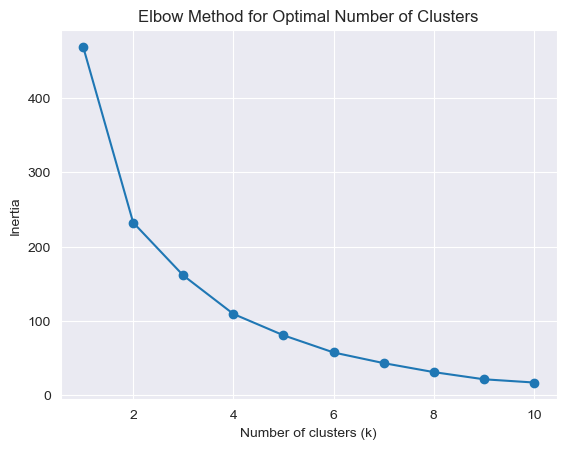

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes_train.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_train_norm[metrics_names]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    score = silhouette_score(A_dense, kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Best number of clusters:", best_k)
silhouette_scores

Best number of clusters: 5


[0.8059610429789998,
 0.8001284456916566,
 0.8209333730756165,
 0.8306375520989963,
 0.7647541577389919,
 0.7167015910968068,
 0.7262010180115577,
 0.6054362708027634,
 0.6261097604643778]

In [11]:
from sklearn.cluster import KMeans

# Assuming df_nodes_train is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_train_norm[metrics_names]

# Specify the number of clusters (k)
#k = best_k  # Adjust as needed
k = 6   

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes_train['Cluster'] = cluster_labels
df_nodes_train_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes_train


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,3
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.000037,0.216042,0.000000,2,9,0.001042,775.838889,2,21451j1KhjAiaYKflxBjr1,1
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z,3
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0.003315,0.257709,0.000000,8,8,0.005582,931.154762,8,3sgFRtyBnxXD5ESfmbK4dl,1
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0.015009,0.279119,0.017544,39,8,0.040012,1047.271429,39,3Isy6kedDrgPYoTS1dazA9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0.000000,0.189761,0.000000,1,10,0.000073,670.628571,1,2K13AVg3bFpHSxDM1vJ0qA,1
3697,Nate Fox,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,7xDiCwbxPFkL5mFgjirxpV,1
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,0IVapwlnM3dEOiMsHXsghT,1
3699,Noname,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,1EpyA68dKpjf7jXmQL88Hy,1


In [12]:
# Assuming df_nodes_train is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_train_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
1    3203
2     173
0     107
4     102
3      86
5      30
Name: count, dtype: int64


In [13]:
import pandas as pd

data = [
    ["1A 2A 3A 4A", 0, 0, 0, 0, 0, 0, 0],
    ["1A 2A 3A 4B", 0, 0, 0, 0, 0, 1, 1],
    ["1A 2A 3B 4A", 0, 0, 0, 0, 1, 0, 0],
    ["1A 2A 3B 4B", 0, 0, 0, 0, 1, 1, 1],
    ["1A 2B 3A 4A", 0, 0, 1, 1, 0, 0, 0],
    ["1A 2B 3A 4B", 0, 0, 1, 1, 0, 1, 1],
    ["1A 2B 3B 4A", 0, 0, 1, 1, 1, 0, 0],
    ["1A 2B 3B 4B", 0, 0, 1, 1, 1, 1, 1],
    ["1B 2A 3A 4A", 1, 1, 0, 0, 0, 0, 0],
    ["1B 2A 3A 4B", 1, 1, 0, 0, 0, 1, 1],
    ["1B 2A 3B 4A", 1, 1, 0, 0, 1, 0, 0],
    ["1B 2A 3B 4B", 1, 1, 0, 0, 1, 1, 1],
    ["1B 2B 3A 4A", 1, 1, 1, 1, 0, 0, 0],
    ["1B 2B 3A 4B", 1, 1, 1, 1, 0, 1, 1],
    ["1B 2B 3B 4A", 1, 1, 1, 1, 1, 0, 0],
    ["1B 2B 3B 4B", 1, 1, 1, 1, 1, 1, 1]
]

df = pd.DataFrame(data, columns=["profile", "degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"])

df

,profile,degree,weighted degree,eccentricity,closnesscentrality,clustering,betweenesscentrality,eigencentrality
0,1A 2A 3A 4A,0,0,0,0,0,0,0
1,1A 2A 3A 4B,0,0,0,0,0,1,1
2,1A 2A 3B 4A,0,0,0,0,1,0,0
3,1A 2A 3B 4B,0,0,0,0,1,1,1
4,1A 2B 3A 4A,0,0,1,1,0,0,0
5,1A 2B 3A 4B,0,0,1,1,0,1,1
6,1A 2B 3B 4A,0,0,1,1,1,0,0
7,1A 2B 3B 4B,0,0,1,1,1,1,1
8,1B 2A 3A 4A,1,1,0,0,0,0,0
9,1B 2A 3A 4B,1,1,0,0,0,1,1


In [14]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

profile = []

common_columns = ["degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"]

for index, row in df_nodes_train_norm.iterrows():
    match_found = False
    min_dist = np.inf
    min_index = -1

    for index2, prof in df.iterrows():
        # Extract the common columns for the current rows
        radar_row = row[common_columns]
        df_row = prof[common_columns]

        # Calculate the Euclidean distance
        distance = euclidean_distance(radar_row.values, df_row.values)

        if distance < min_dist:
            min_dist = distance
            min_index = index2

    if min_index != -1:
        profile.append(df["profile"].iloc[min_index])
    else:
        profile.append("No Match")

# Insert the 'profile' column into df_nodes_train

df_nodes_train.insert(df_nodes_train.shape[1], 'profile', profile)
df_nodes_train_norm.insert(df_nodes_train_norm.shape[1], 'profile', profile)

df_nodes_train


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster,profile
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,3,1A 2A 3A 4A
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.000037,0.216042,0.000000,2,9,0.001042,775.838889,2,21451j1KhjAiaYKflxBjr1,1,1A 2A 3A 4A
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.000000,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z,3,1A 2A 3A 4A
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0.003315,0.257709,0.000000,8,8,0.005582,931.154762,8,3sgFRtyBnxXD5ESfmbK4dl,1,1A 2A 3A 4A
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0.015009,0.279119,0.017544,39,8,0.040012,1047.271429,39,3Isy6kedDrgPYoTS1dazA9,0,1A 2A 3A 4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0.000000,0.189761,0.000000,1,10,0.000073,670.628571,1,2K13AVg3bFpHSxDM1vJ0qA,1,1A 2A 3A 4A
3697,Nate Fox,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,7xDiCwbxPFkL5mFgjirxpV,1,1A 2A 3A 4A
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,0IVapwlnM3dEOiMsHXsghT,1,1A 2A 3A 4A
3699,Noname,5.064338e+05,45.953952,NaN,0.000000,0.187682,0.000000,1,10,0.000166,663.646825,1,1EpyA68dKpjf7jXmQL88Hy,1,1A 2A 3A 4A


In [15]:
df_nodes_train.to_csv("network_clustered/nodes_train.csv", index=False)

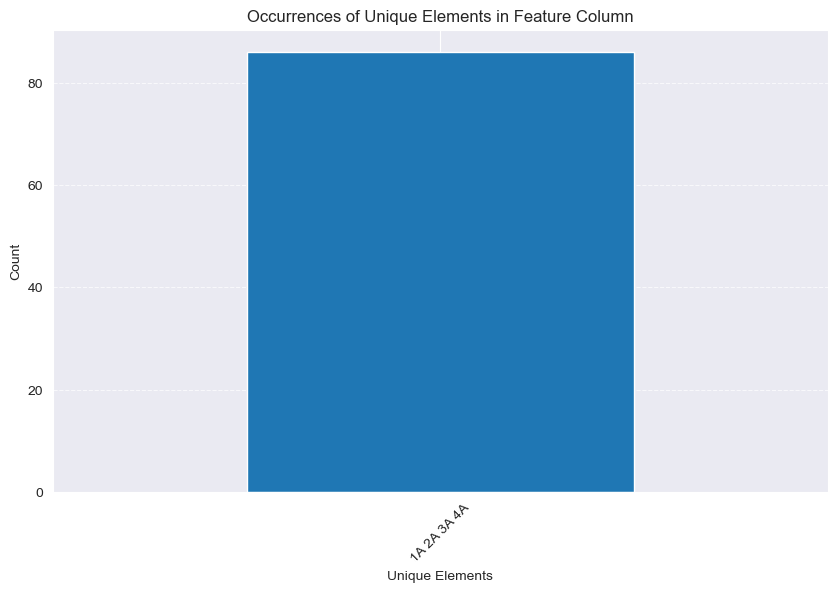

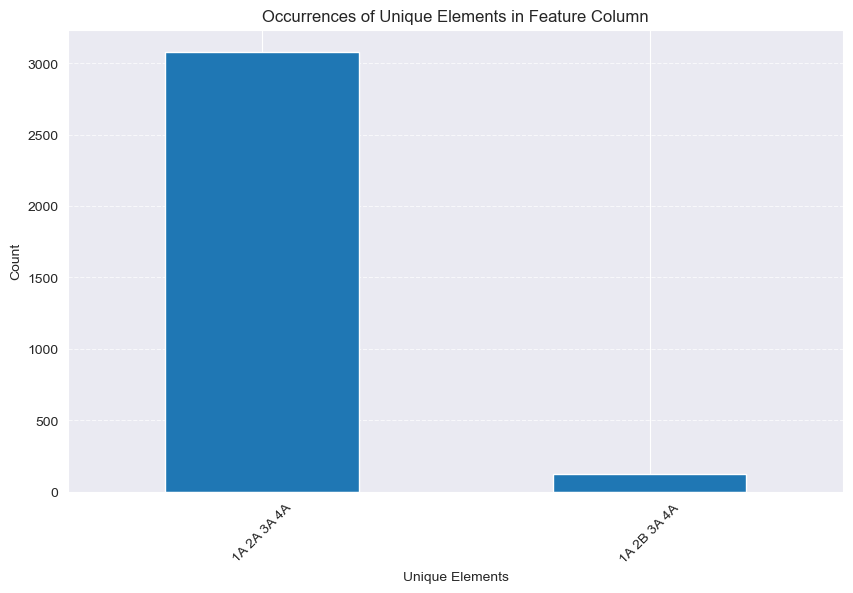

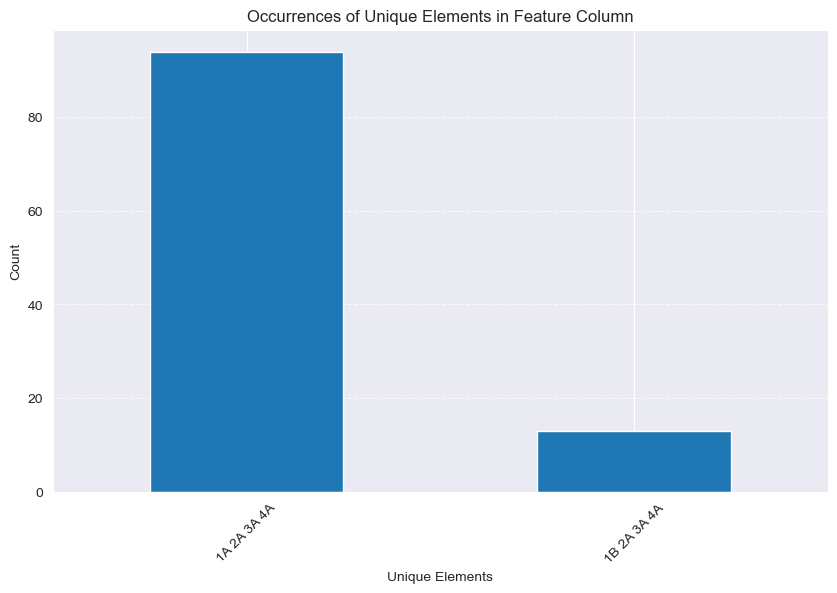

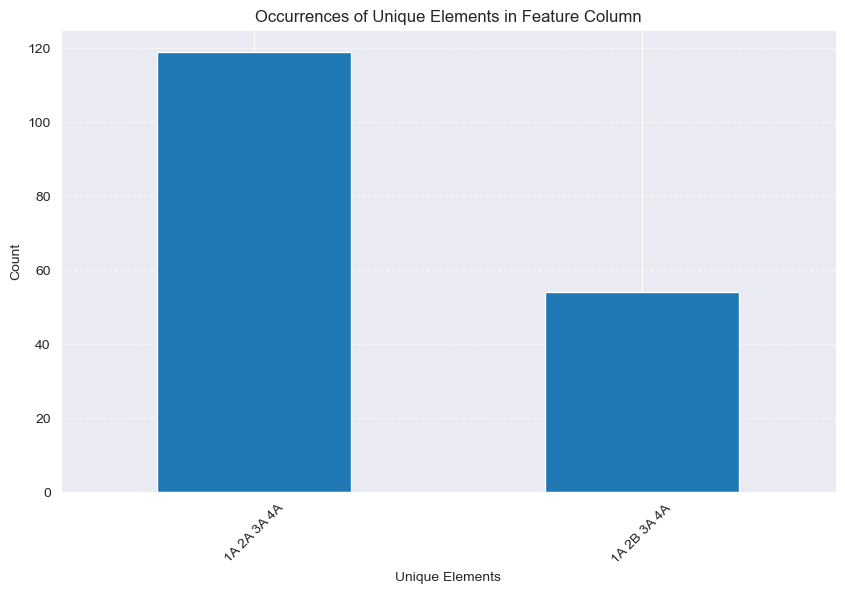

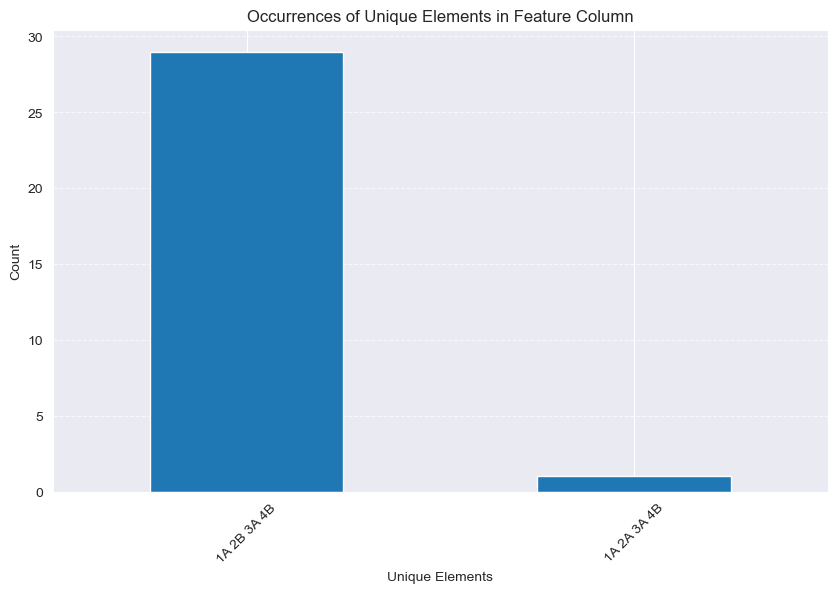

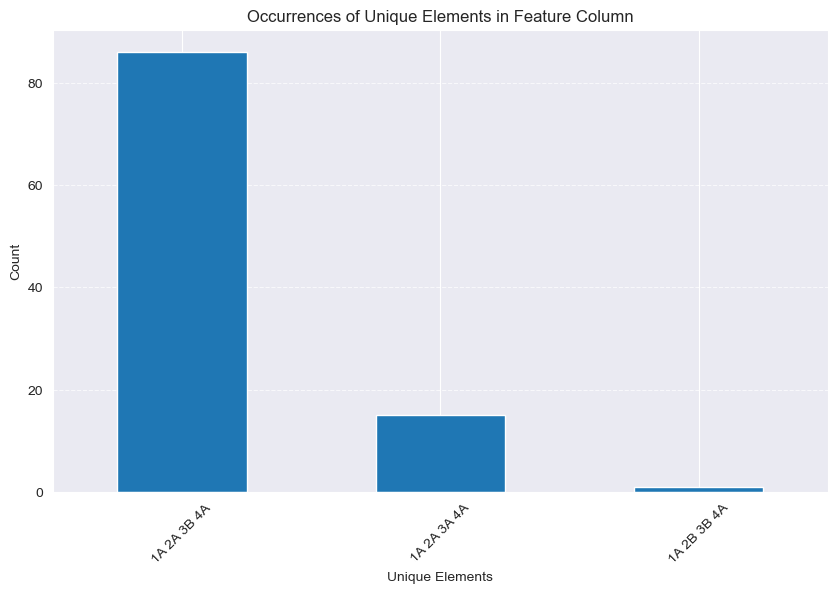

In [16]:
import matplotlib.pyplot as plt

clusters = df_nodes_train["Cluster"].unique()

for i in clusters:

    value_counts = df_nodes_train[df_nodes_train["Cluster"] == i]['profile'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title('Occurrences of Unique Elements in Feature Column')
    plt.xlabel('Unique Elements')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## Test Data

In [17]:
import math

import pandas as pd

df_nodes_test = pd.read_csv("network_created/nodes_real_test.csv", sep="\t")
df_nodes_test.rename(columns={"id" : "Spotify ID"}, inplace=True)
df_nodes_test

,Spotify ID,artist_name,followers,popularity,genres
0,5M52tdBnJaKSvOpJGz8mfZ,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro..."
1,21451j1KhjAiaYKflxBjr1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',..."
2,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,2.509822e+06,84.000000,"['emo rap', 'lgbtq+ hip hop']"
3,4GvEc3ANtPPjt1ZJllr5Zl,Bazzi,2.037540e+06,88.000000,"['dance pop', 'pop', 'post-teen pop']"
4,2UazAtjfzqBF0Nho2awK4z,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru..."
...,...,...,...,...,...
3105,4UodukR17NIQfNu5uaqm9B,Jamila Woods,7.224834e+05,51.200404,NaN
3106,1ybINI1qPiFbwDXamRtwxD,Smino,2.546880e+05,74.000000,"['alternative r&b', 'hip hop', 'pop rap', 'rap..."
3107,49O0SPoCoTiK2Nn2tOaHyU,Knox Fortune,7.224834e+05,51.200404,NaN
3108,1ewyVtTZBqFYWIcepopRhp,Joey Purp,7.224834e+05,51.200404,NaN


In [18]:
df_edges_test = pd.read_csv("network_created/edges_real_test.csv", sep="\t")
df_edges_test

,Source,Target
0,21451j1KhjAiaYKflxBjr1,1i8SpTcr7yvPOmcqrbnVXY
1,21451j1KhjAiaYKflxBjr1,1r4hJ1h58CWwUQe3MxPuau
2,21451j1KhjAiaYKflxBjr1,1wZtkThiXbVNtj6hee6dz9
3,21451j1KhjAiaYKflxBjr1,1vyhD5VmyZ7KMfW5gqLgo5
4,21451j1KhjAiaYKflxBjr1,33ScadVnbm2X8kkUqOkC6Z
...,...,...
4655,1anyVhU62p31KFi8MEzkbf,4UodukR17NIQfNu5uaqm9B
4656,1anyVhU62p31KFi8MEzkbf,1ybINI1qPiFbwDXamRtwxD
4657,1anyVhU62p31KFi8MEzkbf,49O0SPoCoTiK2Nn2tOaHyU
4658,1anyVhU62p31KFi8MEzkbf,1ewyVtTZBqFYWIcepopRhp


In [19]:
import networkx as nx
import pandas as pd


# Create a graph object
G2 = nx.Graph()

# Add nodes with attributes to the graph
for _, row in df_nodes_test.iterrows():
    node_attrs = {attr: row[attr] for attr in df_nodes_test.columns if attr != 'Spotify ID'}
    G2.add_node(row['Spotify ID'], **node_attrs)

# Add edges with attributes to the graph
for _, row in df_edges_test.iterrows():
    edge_attrs = {attr: row[attr] for attr in df_edges_test.columns if attr not in ['Source', 'Target']}
    G2.add_edge(row['Source'], row['Target'], **edge_attrs)

In [20]:
import pandas as pd
import community
import networkx as nx

# Assuming G is your graph object containing nodes and edges

# Get all connected components
connected_components = nx.connected_components(G2)

# Initialize dictionaries to store metrics for each node
degree = {}
weighted_degree = {}
eccentricity = {}
closeness_centrality = {}
harmonic_closeness_centrality = {}
betweenness_centrality = {}
clustering = {}
eigenvector_centrality = {}

# For each connected component
for cc in connected_components:
    # Create a subgraph of G consisting only of this component
    Gc = G2.subgraph(cc).copy()

    # Calculate metrics for this component
    betweenness_centrality.update(nx.betweenness_centrality(Gc))
    closeness_centrality.update(nx.closeness_centrality(Gc))
    clustering.update(nx.clustering(Gc))
    degree.update(nx.degree(Gc))
    eccentricity.update(nx.eccentricity(Gc))
    eigenvector_centrality.update(nx.eigenvector_centrality(Gc, max_iter=1000, tol=1e-6))
    harmonic_closeness_centrality.update(nx.harmonic_centrality(Gc))
    weighted_degree.update(nx.degree(Gc, weight='weight'))

# Assign metrics as node attributes in the original graph G
nx.set_node_attributes(G2, betweenness_centrality, 'betweenesscentrality')  
nx.set_node_attributes(G2, closeness_centrality, 'closnesscentrality')
nx.set_node_attributes(G2, clustering, 'clustering')
nx.set_node_attributes(G2, degree, 'degree')
nx.set_node_attributes(G2, eccentricity, 'eccentricity')
nx.set_node_attributes(G2, eigenvector_centrality, 'eigencentrality')
nx.set_node_attributes(G2, harmonic_closeness_centrality, 'harmonicclosnesscentrality')
nx.set_node_attributes(G2, weighted_degree, 'weighted degree')

# Now your graph G has all the calculated metrics stored as node attributes

In [21]:
# Assuming G is your NetworkX graph

# Extract nodes and their attributes from the graph
nodes_with_attributes = [(G2.nodes[node], node) for node in G2.nodes()]

# Create a DataFrame from the nodes and their attributes
df_nodes_test = pd.DataFrame(nodes_with_attributes, columns=['Attributes', "Spotify ID"])

# Normalize the 'Attributes' column to expand it into separate columns
df_attributes = pd.json_normalize(df_nodes_test['Attributes'])

# Combine the original 'Node' column with the expanded attributes
df_nodes_test = pd.concat([df_attributes, df_nodes_test['Spotify ID']], axis=1)

# Display the DataFrame
df_nodes_test


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.002599,0.228616,0.4,5,9,0.002990,685.624603,5,21451j1KhjAiaYKflxBjr1
2,Lil Peep,2.509822e+06,84.000000,"['emo rap', 'lgbtq+ hip hop']",0.004751,0.251798,0.0,10,9,0.013521,754.281746,10,2kCcBybjl3SAtIcwdWpUe3
3,Bazzi,2.037540e+06,88.000000,"['dance pop', 'pop', 'post-teen pop']",0.000185,0.241716,0.0,4,10,0.015271,721.214683,4,4GvEc3ANtPPjt1ZJllr5Zl
4,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Jamila Woods,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,4UodukR17NIQfNu5uaqm9B
3106,Smino,2.546880e+05,74.000000,"['alternative r&b', 'hip hop', 'pop rap', 'rap...",0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ybINI1qPiFbwDXamRtwxD
3107,Knox Fortune,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,49O0SPoCoTiK2Nn2tOaHyU
3108,Joey Purp,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ewyVtTZBqFYWIcepopRhp


In [22]:
metrics_names = ['betweenesscentrality',
 'closnesscentrality',
 'clustering',
 'degree',
 'eccentricity',
 'eigencentrality',
 'weighted degree']

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes_test is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = metrics_names  # Exclude the first and last columns
data_to_normalize = df_nodes_test[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_test_norm = df_nodes_test.copy()
df_nodes_test_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_test_norm


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,5M52tdBnJaKSvOpJGz8mfZ
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.002599,0.228616,0.4,0.026316,0.642857,0.002990,685.624603,0.026316,21451j1KhjAiaYKflxBjr1
2,Lil Peep,2.509822e+06,84.000000,"['emo rap', 'lgbtq+ hip hop']",0.004751,0.251798,0.0,0.052632,0.642857,0.013521,754.281746,0.052632,2kCcBybjl3SAtIcwdWpUe3
3,Bazzi,2.037540e+06,88.000000,"['dance pop', 'pop', 'post-teen pop']",0.000185,0.241716,0.0,0.021053,0.714286,0.015271,721.214683,0.021053,4GvEc3ANtPPjt1ZJllr5Zl
4,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,2UazAtjfzqBF0Nho2awK4z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Jamila Woods,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,0.005263,0.785714,0.002113,633.039358,0.005263,4UodukR17NIQfNu5uaqm9B
3106,Smino,2.546880e+05,74.000000,"['alternative r&b', 'hip hop', 'pop rap', 'rap...",0.000000,0.214982,0.0,0.005263,0.785714,0.002113,633.039358,0.005263,1ybINI1qPiFbwDXamRtwxD
3107,Knox Fortune,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,0.005263,0.785714,0.002113,633.039358,0.005263,49O0SPoCoTiK2Nn2tOaHyU
3108,Joey Purp,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,0.005263,0.785714,0.002113,633.039358,0.005263,1ewyVtTZBqFYWIcepopRhp


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


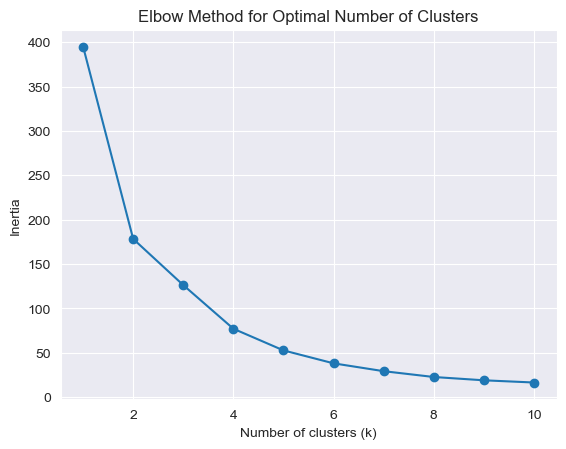

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes_test.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_test_norm[metrics_names]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    score = silhouette_score(A_dense, kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Best number of clusters:", best_k)
silhouette_scores

Best number of clusters: 5


[0.811036889715118,
 0.8250114369634222,
 0.8461130315337207,
 0.8486835955208963,
 0.8375623483965613,
 0.6414447533059917,
 0.5756532822195729,
 0.5920311108429287,
 0.5938471114360341]

In [26]:
from sklearn.cluster import KMeans

# Assuming df_nodes_test is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_test_norm[metrics_names]

# Specify the number of clusters (k)
#k = best_k  # Adjust as needed
k = 6

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes_test['Cluster'] = cluster_labels
df_nodes_test_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes_test


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,1
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.002599,0.228616,0.4,5,9,0.002990,685.624603,5,21451j1KhjAiaYKflxBjr1,0
2,Lil Peep,2.509822e+06,84.000000,"['emo rap', 'lgbtq+ hip hop']",0.004751,0.251798,0.0,10,9,0.013521,754.281746,10,2kCcBybjl3SAtIcwdWpUe3,0
3,Bazzi,2.037540e+06,88.000000,"['dance pop', 'pop', 'post-teen pop']",0.000185,0.241716,0.0,4,10,0.015271,721.214683,4,4GvEc3ANtPPjt1ZJllr5Zl,0
4,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Jamila Woods,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,4UodukR17NIQfNu5uaqm9B,0
3106,Smino,2.546880e+05,74.000000,"['alternative r&b', 'hip hop', 'pop rap', 'rap...",0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ybINI1qPiFbwDXamRtwxD,0
3107,Knox Fortune,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,49O0SPoCoTiK2Nn2tOaHyU,0
3108,Joey Purp,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ewyVtTZBqFYWIcepopRhp,0


In [27]:
# Assuming df_nodes_test is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_test_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
0    2744
2     150
1      82
3      62
5      46
4      26
Name: count, dtype: int64


In [28]:
import pandas as pd

data = [
    ["1A 2A 3A 4A", 0, 0, 0, 0, 0, 0, 0],
    ["1A 2A 3A 4B", 0, 0, 0, 0, 0, 1, 1],
    ["1A 2A 3B 4A", 0, 0, 0, 0, 1, 0, 0],
    ["1A 2A 3B 4B", 0, 0, 0, 0, 1, 1, 1],
    ["1A 2B 3A 4A", 0, 0, 1, 1, 0, 0, 0],
    ["1A 2B 3A 4B", 0, 0, 1, 1, 0, 1, 1],
    ["1A 2B 3B 4A", 0, 0, 1, 1, 1, 0, 0],
    ["1A 2B 3B 4B", 0, 0, 1, 1, 1, 1, 1],
    ["1B 2A 3A 4A", 1, 1, 0, 0, 0, 0, 0],
    ["1B 2A 3A 4B", 1, 1, 0, 0, 0, 1, 1],
    ["1B 2A 3B 4A", 1, 1, 0, 0, 1, 0, 0],
    ["1B 2A 3B 4B", 1, 1, 0, 0, 1, 1, 1],
    ["1B 2B 3A 4A", 1, 1, 1, 1, 0, 0, 0],
    ["1B 2B 3A 4B", 1, 1, 1, 1, 0, 1, 1],
    ["1B 2B 3B 4A", 1, 1, 1, 1, 1, 0, 0],
    ["1B 2B 3B 4B", 1, 1, 1, 1, 1, 1, 1]
]

df = pd.DataFrame(data, columns=["profile", "degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"])

df

,profile,degree,weighted degree,eccentricity,closnesscentrality,clustering,betweenesscentrality,eigencentrality
0,1A 2A 3A 4A,0,0,0,0,0,0,0
1,1A 2A 3A 4B,0,0,0,0,0,1,1
2,1A 2A 3B 4A,0,0,0,0,1,0,0
3,1A 2A 3B 4B,0,0,0,0,1,1,1
4,1A 2B 3A 4A,0,0,1,1,0,0,0
5,1A 2B 3A 4B,0,0,1,1,0,1,1
6,1A 2B 3B 4A,0,0,1,1,1,0,0
7,1A 2B 3B 4B,0,0,1,1,1,1,1
8,1B 2A 3A 4A,1,1,0,0,0,0,0
9,1B 2A 3A 4B,1,1,0,0,0,1,1


In [29]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

profile = []

common_columns = ["degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"]

for index, row in df_nodes_test_norm.iterrows():
    match_found = False
    min_dist = np.inf
    min_index = -1

    for index2, prof in df.iterrows():
        # Extract the common columns for the current rows
        radar_row = row[common_columns]
        df_row = prof[common_columns]

        # Calculate the Euclidean distance
        distance = euclidean_distance(radar_row.values, df_row.values)

        if distance < min_dist:
            min_dist = distance
            min_index = index2

    if min_index != -1:
        profile.append(df["profile"].iloc[min_index])
    else:
        profile.append("No Match")

# Insert the 'profile' column into df_nodes_test

df_nodes_test.insert(df_nodes_test.shape[1], 'profile', profile)
df_nodes_test_norm.insert(df_nodes_test_norm.shape[1], 'profile', profile)

df_nodes_test


,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster,profile
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,1,1A 2A 3A 4A
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0.002599,0.228616,0.4,5,9,0.002990,685.624603,5,21451j1KhjAiaYKflxBjr1,0,1A 2A 3A 4A
2,Lil Peep,2.509822e+06,84.000000,"['emo rap', 'lgbtq+ hip hop']",0.004751,0.251798,0.0,10,9,0.013521,754.281746,10,2kCcBybjl3SAtIcwdWpUe3,0,1A 2A 3A 4A
3,Bazzi,2.037540e+06,88.000000,"['dance pop', 'pop', 'post-teen pop']",0.000185,0.241716,0.0,4,10,0.015271,721.214683,4,4GvEc3ANtPPjt1ZJllr5Zl,0,1A 2A 3A 4A
4,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0.000000,0.000000,0.0,0,0,1.000000,0.000000,0,2UazAtjfzqBF0Nho2awK4z,1,1A 2A 3A 4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Jamila Woods,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,4UodukR17NIQfNu5uaqm9B,0,1A 2B 3A 4A
3106,Smino,2.546880e+05,74.000000,"['alternative r&b', 'hip hop', 'pop rap', 'rap...",0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ybINI1qPiFbwDXamRtwxD,0,1A 2B 3A 4A
3107,Knox Fortune,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,49O0SPoCoTiK2Nn2tOaHyU,0,1A 2B 3A 4A
3108,Joey Purp,7.224834e+05,51.200404,NaN,0.000000,0.214982,0.0,1,11,0.002113,633.039358,1,1ewyVtTZBqFYWIcepopRhp,0,1A 2B 3A 4A


In [30]:
df_nodes_test.to_csv("network_clustered/nodes_test.csv", index=False)

## Additional Information and Metrics:


In [31]:
##Dimensional reduction:

import pandas as pd
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# maybe include other normalized features like pop and foll????
columns = metrics_names.copy()    
#columns.append("popularity")


# Omit the first and last columns
X = df_nodes_train_norm[metrics_names]

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(X)

# Convert the result to a DataFrame
df_2d = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])

# Display the resulting DataFrame
df_2d["Spotify ID"] = df_nodes_train["Spotify ID"]
df_2d["Cluster"] = df_nodes_train["Cluster"]
df_2d

,Component 1,Component 2,Spotify ID,Cluster
0,0.974676,-0.089590,5M52tdBnJaKSvOpJGz8mfZ,3
1,-0.071695,-0.039454,21451j1KhjAiaYKflxBjr1,1
2,0.974676,-0.089590,2UazAtjfzqBF0Nho2awK4z,3
3,-0.003909,-0.029037,3sgFRtyBnxXD5ESfmbK4dl,1
4,0.031562,0.009234,3Isy6kedDrgPYoTS1dazA9,0
...,...,...,...,...
3696,-0.130871,-0.045342,2K13AVg3bFpHSxDM1vJ0qA,1
3697,-0.131503,-0.045529,7xDiCwbxPFkL5mFgjirxpV,1
3698,-0.131503,-0.045529,0IVapwlnM3dEOiMsHXsghT,1
3699,-0.131503,-0.045529,1EpyA68dKpjf7jXmQL88Hy,1


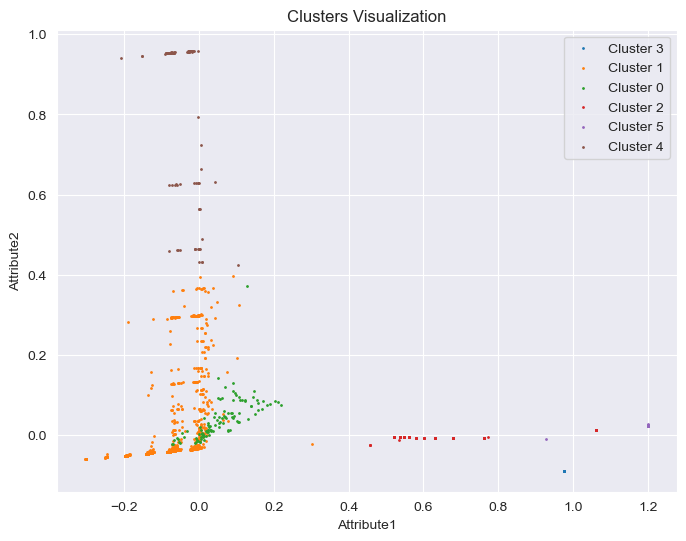

In [32]:
import matplotlib.pyplot as plt

# Assuming df_nodes is your DataFrame with cluster labels

# Plot the clusters in a scatter plot
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in df_2d['Cluster'].unique():
    # Filter the DataFrame for nodes in the current cluster
    df_cluster = df_2d[df_2d['Cluster'] == cluster_label]
    # Plot the nodes in the cluster
    plt.scatter(df_cluster["Component 1"], df_cluster["Component 2"], s=1, label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Clusters Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


In [33]:
radar_df = df_nodes_train_norm.copy()
features = radar_df[metrics_names]
for feature in features:
    radar_df[feature] = (radar_df[feature] >= 0.5).astype(int)

radar_df

,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster,profile
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0,0,0,0,0,1,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,3,1A 2A 3A 4A
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0,0,0,0,1,0,775.838889,0,21451j1KhjAiaYKflxBjr1,1,1A 2A 3A 4A
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0,0,0,0,0,1,0.000000,0,2UazAtjfzqBF0Nho2awK4z,3,1A 2A 3A 4A
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0,0,0,0,1,0,931.154762,0,3sgFRtyBnxXD5ESfmbK4dl,1,1A 2A 3A 4A
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0,0,0,0,1,0,1047.271429,0,3Isy6kedDrgPYoTS1dazA9,0,1A 2A 3A 4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0,0,0,0,1,0,670.628571,0,2K13AVg3bFpHSxDM1vJ0qA,1,1A 2A 3A 4A
3697,Nate Fox,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,7xDiCwbxPFkL5mFgjirxpV,1,1A 2A 3A 4A
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,0IVapwlnM3dEOiMsHXsghT,1,1A 2A 3A 4A
3699,Noname,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,1EpyA68dKpjf7jXmQL88Hy,1,1A 2A 3A 4A


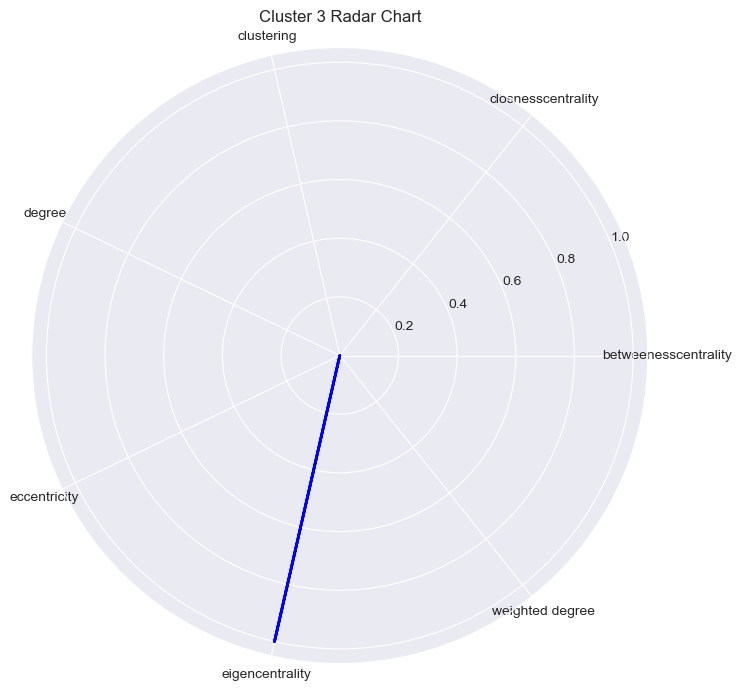

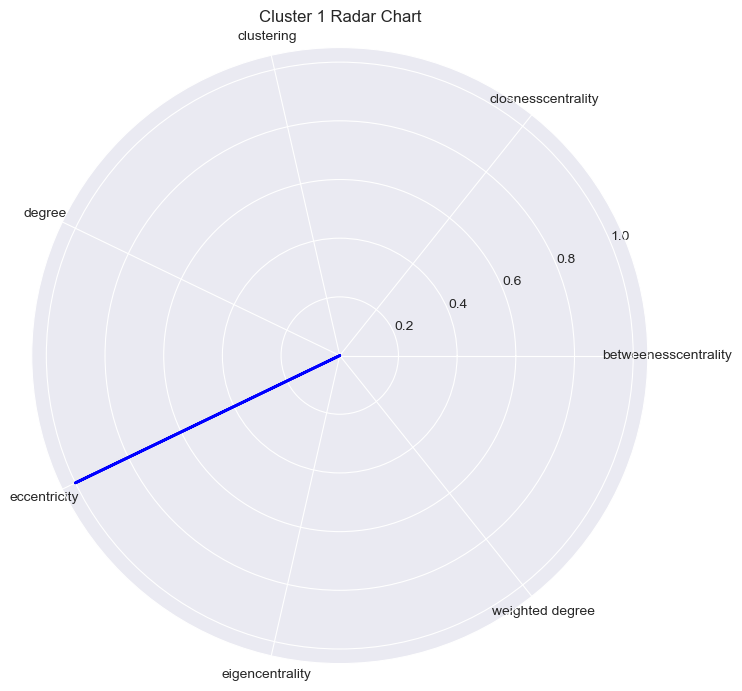

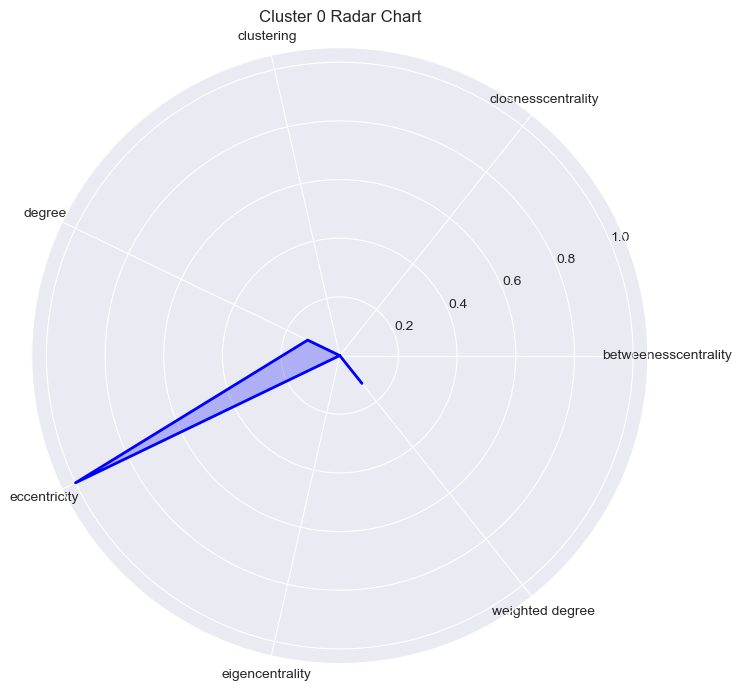

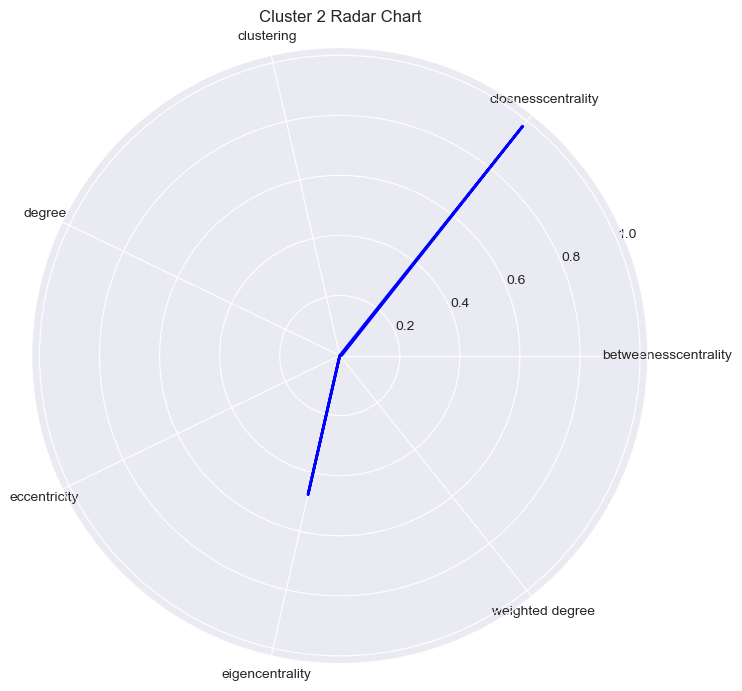

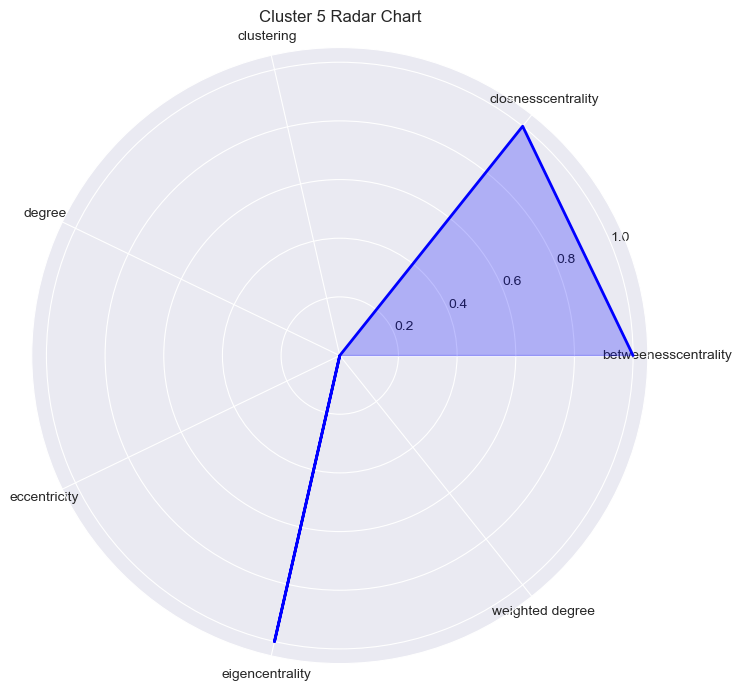

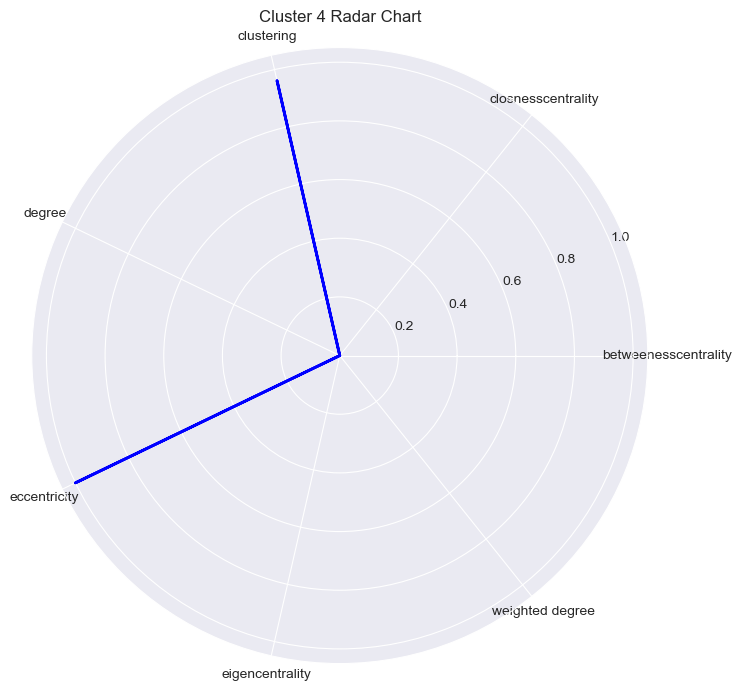

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#for radar charts values to 1 if 0.5 or higher, rest to 0?
#######Profiles?##########

# Define the attributes for the radar chart
attributes = radar_df[metrics_names].columns.tolist()

# Define the theta values (angles) for each attribute
theta = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False)

# Iterate over each unique cluster label
for cluster_label in radar_df['Cluster'].unique():
    # Create a figure and add a subplot with polar projection for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Filter the DataFrame for the current cluster
    cluster_data = radar_df[radar_df['Cluster'] == cluster_label]

    # Get attribute values for the current cluster
    values = cluster_data[metrics_names].mean(axis=0).tolist()

    # Repeat the first value to close the plot
    #values += values[:1]

    # Plot the radar chart
    ax.fill(theta, values, color='blue', alpha=0.25)
    ax.plot(theta, values, color='blue', linewidth=2)

    # Set the labels for each attribute
    ax.set_xticks(theta)
    ax.set_xticklabels(attributes)

    # Set the title for the radar chart
    ax.set_title(f'Cluster {cluster_label} Radar Chart')

    # Show plot
    plt.show()


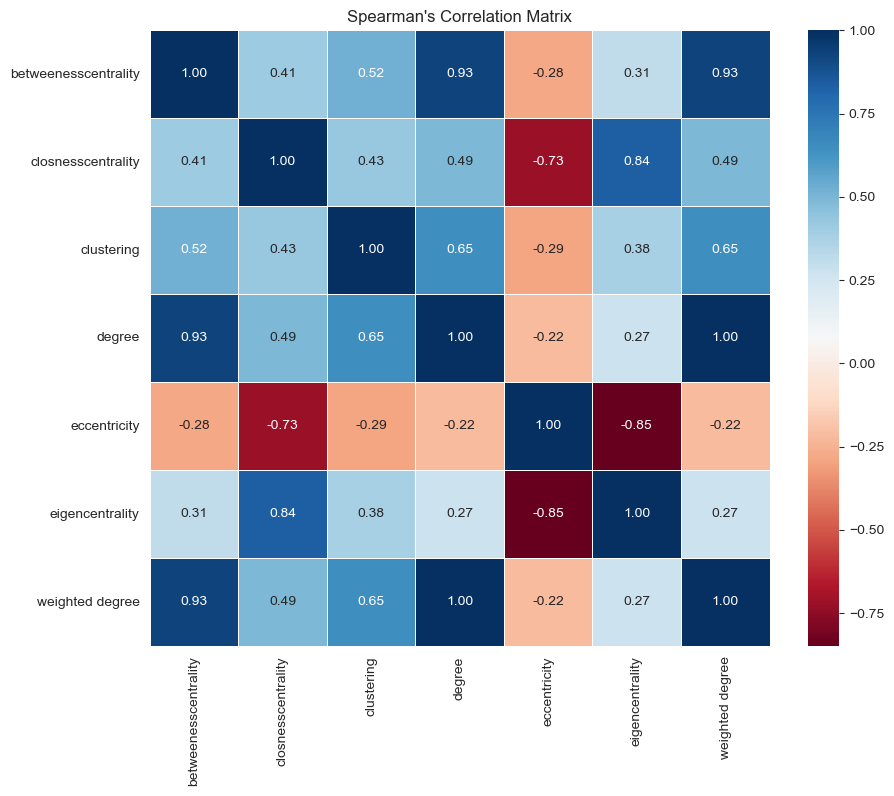

In [35]:
import seaborn as sns

# Compute Spearman's correlation matrix
corr_matrix = df_nodes_train_norm[columns].corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman's Correlation Matrix")
plt.show()


In [36]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

profile = []

radar_df.drop(columns="profile", inplace=True)

common_columns = ["degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"]

for index, row in radar_df.iterrows():
    match_found = False
    min_dist = np.inf
    min_index = -1

    for index2, prof in df.iterrows():
        # Extract the common columns for the current rows
        radar_row = row[common_columns]
        df_row = prof[common_columns]

        # Calculate the Euclidean distance
        distance = euclidean_distance(radar_row.values, df_row.values)

        if distance < min_dist:
            min_dist = distance
            min_index = index2

    if min_index != -1:
        profile.append(df["profile"].iloc[min_index])
    else:
        profile.append("No Match")

# Insert the 'profile' column into df_nodes_test

radar_df.insert(radar_df.shape[1], 'profile', profile)

radar_df

,artist_name,followers,popularity,genres,betweenesscentrality,closnesscentrality,clustering,degree,eccentricity,eigencentrality,harmonicclosnesscentrality,weighted degree,Spotify ID,Cluster,profile
0,Black Sabbath,3.791327e+06,76.000000,"['album rock', 'birmingham metal', 'classic ro...",0,0,0,0,0,1,0.000000,0,5M52tdBnJaKSvOpJGz8mfZ,3,1A 2A 3A 4A
1,Zion & Lennox,3.654776e+06,85.000000,"['latin', 'latin hip hop', 'latin pop', 'pop',...",0,0,0,0,1,0,775.838889,0,21451j1KhjAiaYKflxBjr1,1,1A 2A 3A 4A
2,Stone Temple Pilots,1.716077e+06,71.000000,"['alternative metal', 'alternative rock', 'gru...",0,0,0,0,0,1,0.000000,0,2UazAtjfzqBF0Nho2awK4z,3,1A 2A 3A 4A
3,LMFAO,3.198119e+06,70.000000,"['dance pop', 'pop', 'pop rap']",0,0,0,0,1,0,931.154762,0,3sgFRtyBnxXD5ESfmbK4dl,1,1A 2A 3A 4A
4,Sean Paul,2.606395e+06,86.000000,"['dance pop', 'dancehall']",0,0,0,0,1,0,1047.271429,0,3Isy6kedDrgPYoTS1dazA9,0,1A 2A 3A 4A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,CSS,1.013120e+05,49.000000,"['alternative dance', 'dance-punk', 'electrocl...",0,0,0,0,1,0,670.628571,0,2K13AVg3bFpHSxDM1vJ0qA,1,1A 2A 3A 4A
3697,Nate Fox,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,7xDiCwbxPFkL5mFgjirxpV,1,1A 2A 3A 4A
3698,Nosaj Thing,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,0IVapwlnM3dEOiMsHXsghT,1,1A 2A 3A 4A
3699,Noname,5.064338e+05,45.953952,NaN,0,0,0,0,1,0,663.646825,0,1EpyA68dKpjf7jXmQL88Hy,1,1A 2A 3A 4A


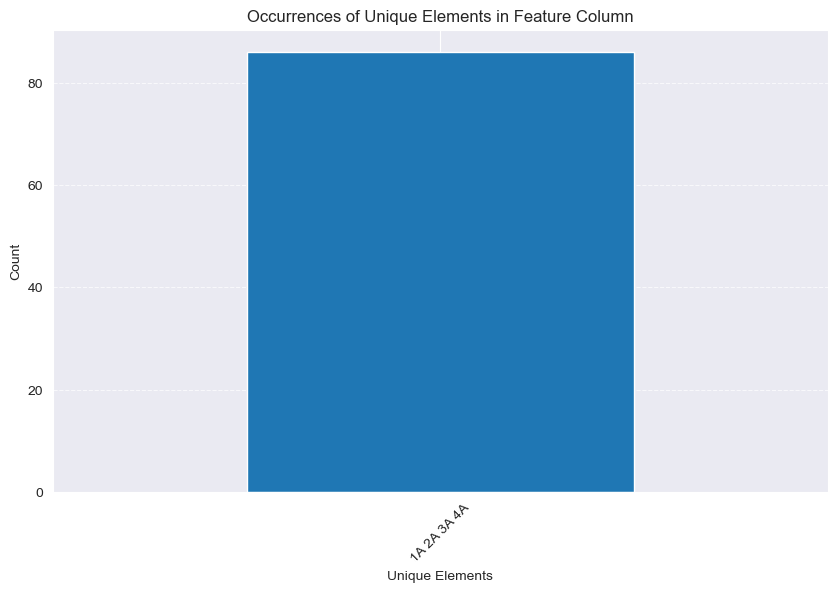

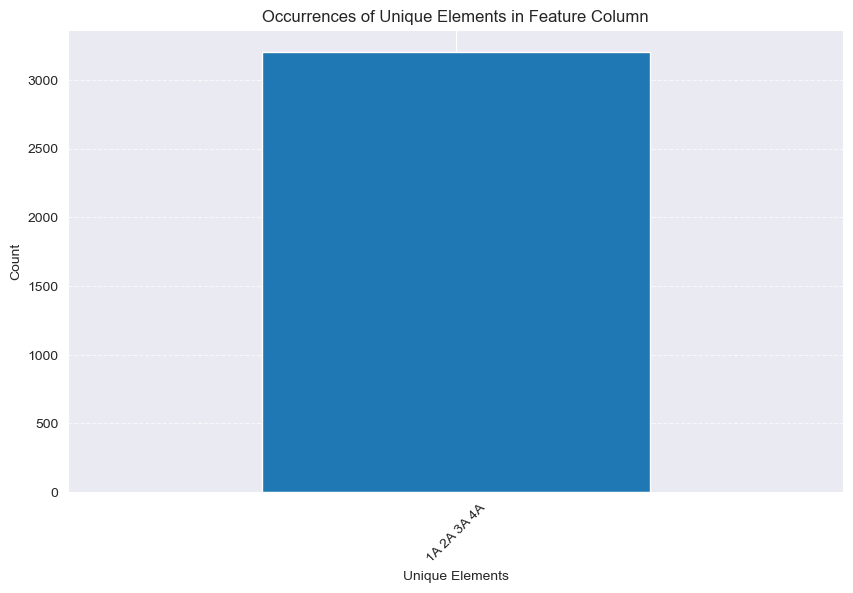

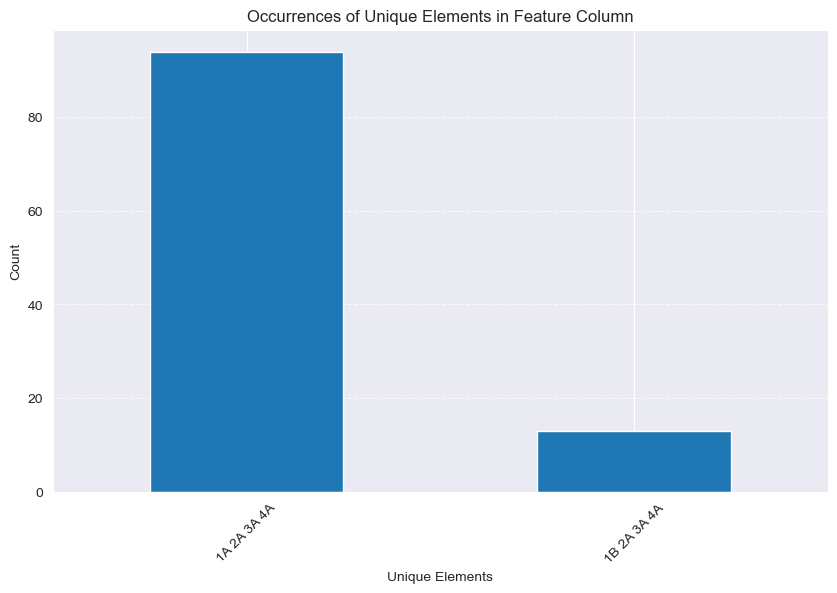

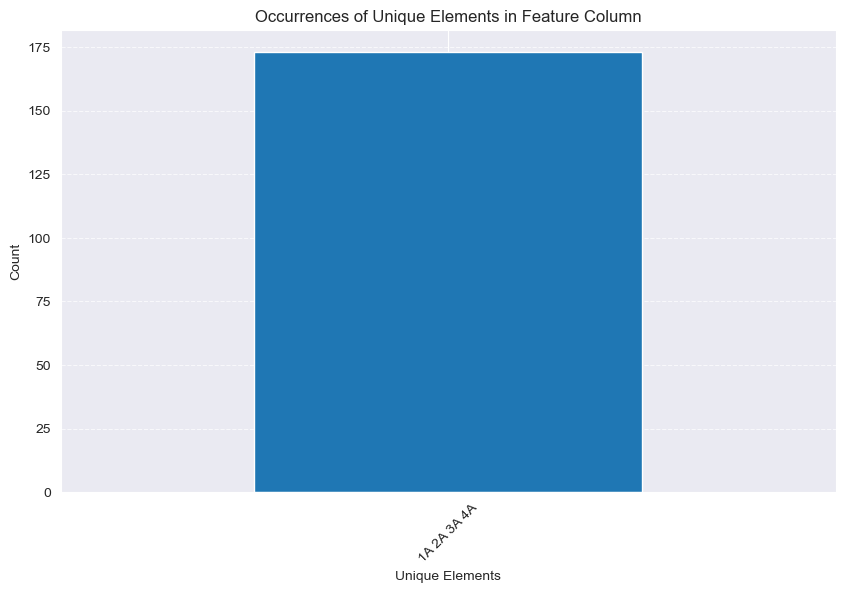

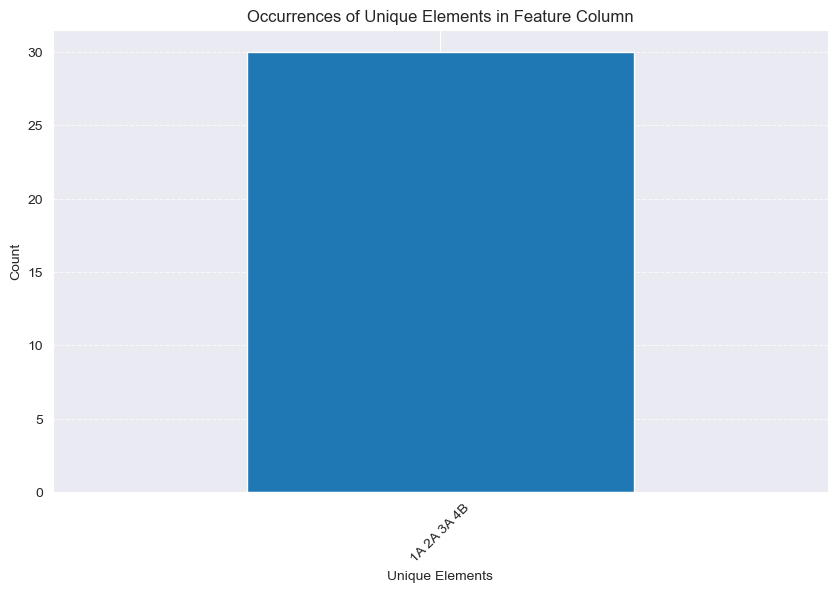

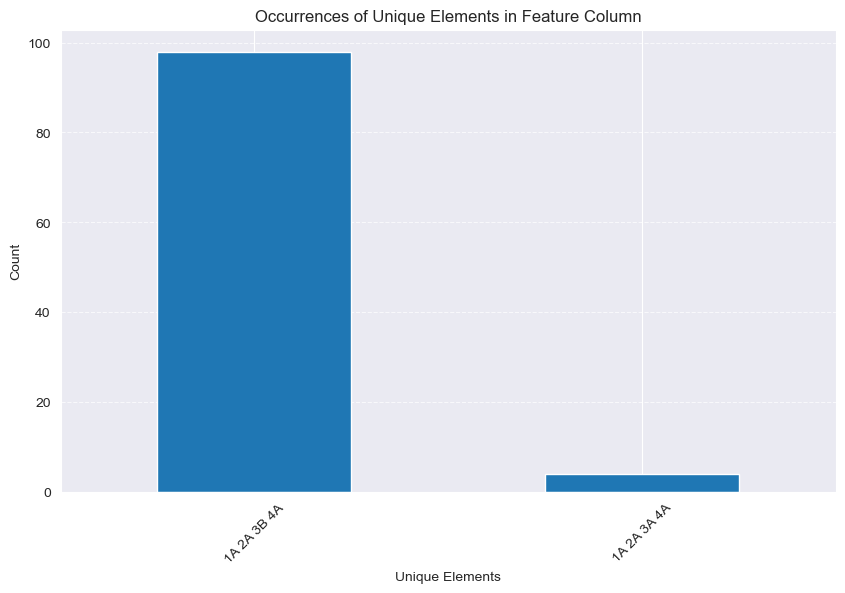

In [37]:
import matplotlib.pyplot as plt

clusters = radar_df["Cluster"].unique()

for i in clusters:

    value_counts = radar_df[radar_df["Cluster"] == i]['profile'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title('Occurrences of Unique Elements in Feature Column')
    plt.xlabel('Unique Elements')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
